In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("SchedulingSolarData3.csv")
data_fields = data.columns[1:24]
data_fields

Index(['Drive Time', 'Tilt', 'Azimuth', 'Panel QTY', 'System Rating (kW DC)',
       'Inverter Manufacturer', 'Array Type', 'Squirrel Screen',
       'Consumption Monitoring', 'Truss / Rafter', 'Reinforcements',
       'Rough Electrical Inspection', 'Interconnection Type', 'Module Length',
       'Module Width', 'Module Weight', '# of Arrays', '# of reinforcement',
       'Roof Type', 'Attachment Type', 'Portrait / Landscape', '# of Stories',
       'Install Season'],
      dtype='object')

In [3]:
# Convert categorical variables to numeric encoding
categorical_cols = ["Inverter Manufacturer", "Array Type",
                    "Truss / Rafter", "Interconnection Type",
                    "Roof Type", "Attachment Type"]

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns
data.drop(columns=categorical_cols, inplace=True)

# Merge encoded data back
data = pd.concat([data, encoded_df], axis=1)


In [4]:
data[:]

,Project ID,Drive Time,Tilt,Azimuth,Panel QTY,System Rating (kW DC),Squirrel Screen,Consumption Monitoring,Reinforcements,Rough Electrical Inspection,...,Roof Type_Ground Mount,Roof Type_Standing Seam Metal Roof,Attachment Type_Flashfoot 2,Attachment Type_Flashloc RM,Attachment Type_Flashview,Attachment Type_Ground Mount,Attachment Type_Hugs,Attachment Type_RT Mini,Attachment Type_S-5!,Attachment Type_Unk0wn
0,1,21,33,180,19,6.84,1.0,NaN,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,23,45,139,18,6.57,1.0,NaN,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,21,24,180,16,5.12,0.0,NaN,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,38,20,104,27,10.80,0.0,NaN,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,38,20,180,27,10.80,0.0,NaN,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,350,23,22,90/180/270,50,23.00,0.0,1.0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
273,351,42,15,180,16,7.36,1.0,1.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,352,26,30.3,158,14,5.60,1.0,1.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,353,51,39,163/250/70,26,11.70,1.0,1.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
azimuth_split = data["Azimuth"].str.split("/", expand=True)

# Assign the split values to new columns
data["Azimuth1"] = azimuth_split[0]
data["Azimuth2"] = azimuth_split[1]
data["Azimuth3"] = azimuth_split[2]

# Drop the original Azimuth column
data.drop(columns=["Azimuth"], inplace=True)

In [6]:
tilt_split = data["Tilt"].str.split("/", expand=True)

# Assign the split values to new columns
data["Tilt1"] = tilt_split[0]
data["Tilt2"] = tilt_split[1]

# Drop the original Tilt column
data.drop(columns=["Tilt"], inplace=True)

In [7]:
data_fields = list(data.columns[1:16]) + list(data.columns[25:])
data_fields

['Drive Time',
 'Panel QTY',
 'System Rating (kW DC)',
 'Squirrel Screen',
 'Consumption Monitoring',
 'Reinforcements',
 'Rough Electrical Inspection',
 'Module Length',
 'Module Width',
 'Module Weight',
 '# of Arrays',
 '# of reinforcement',
 'Portrait / Landscape',
 '# of Stories',
 'Install Season',
 'Inverter Manufacturer_GoodWe',
 'Inverter Manufacturer_SMA',
 'Inverter Manufacturer_SolarEdge',
 'Inverter Manufacturer_nan',
 'Array Type_Roof Mount',
 'Truss / Rafter_Purlin',
 'Truss / Rafter_Rafter',
 'Truss / Rafter_TJI',
 'Truss / Rafter_Truss',
 'Interconnection Type_A1',
 'Interconnection Type_A2',
 'Interconnection Type_A3',
 'Interconnection Type_A4',
 'Interconnection Type_B*',
 'Interconnection Type_B1',
 'Interconnection Type_B2',
 'Interconnection Type_C*',
 'Interconnection Type_C1',
 'Interconnection Type_C2',
 'Interconnection Type_C3',
 'Roof Type_Asphalt Shingles',
 'Roof Type_EPDM (Flat Roof)',
 'Roof Type_Ground Mount',
 'Roof Type_Standing Seam Metal Roof',
 'A

In [8]:
data.columns

Index(['Project ID', 'Drive Time', 'Panel QTY', 'System Rating (kW DC)',
       'Squirrel Screen', 'Consumption Monitoring', 'Reinforcements',
       'Rough Electrical Inspection', 'Module Length', 'Module Width',
       'Module Weight', '# of Arrays', '# of reinforcement',
       'Portrait / Landscape', '# of Stories', 'Install Season',
       'Total Direct Time for Project for Hourly Employees (Including Drive Time)',
       'Total # of Days on Site', 'Total # Hourly Empoyees on Site',
       'Estimated # of Salaried Employees on Site', 'Estimated Salary Hours',
       'Estimated Total Direct Time', 'Unnamed: 30',
       'Estimated Total # of People on Site', 'Notes',
       'Inverter Manufacturer_GoodWe', 'Inverter Manufacturer_SMA',
       'Inverter Manufacturer_SolarEdge', 'Inverter Manufacturer_nan',
       'Array Type_Roof Mount', 'Truss / Rafter_Purlin',
       'Truss / Rafter_Rafter', 'Truss / Rafter_TJI', 'Truss / Rafter_Truss',
       'Interconnection Type_A1', 'Interconnect

In [9]:
#test_fields = data.columns[17:20]
#test_fields = test_fields.append(data.columns[21:22])
test_fields = 'Estimated Total Direct Time'

In [10]:
def convert_time_to_hours(time_str):
    if pd.isna(time_str):  # Handle NaN values
        return None
    hours, minutes, seconds = map(int, time_str.split(':'))
    return hours + minutes / 60 + seconds / 3600


In [11]:
data['Estimated Total Direct Time'] = data['Estimated Total Direct Time'].apply(convert_time_to_hours)

In [12]:
data['Estimated Total Direct Time']

0       38.000000
1       67.000000
2       50.666667
3       54.000000
4       54.000000
          ...    
272    185.500000
273     57.750000
274     43.000000
275     98.000000
276     37.750000
Name: Estimated Total Direct Time, Length: 277, dtype: float64

In [13]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data[data_fields])

data[data_fields] = scaled_data


In [14]:
data[data_fields]

,Drive Time,Panel QTY,System Rating (kW DC),Squirrel Screen,Consumption Monitoring,Reinforcements,Rough Electrical Inspection,Module Length,Module Width,Module Weight,...,Attachment Type_Ground Mount,Attachment Type_Hugs,Attachment Type_RT Mini,Attachment Type_S-5!,Attachment Type_Unk0wn,Azimuth1,Azimuth2,Azimuth3,Tilt1,Tilt2
0,-0.440084,-0.236471,-0.402358,0.644503,NaN,-0.380300,-0.830075,-0.884402,-0.463436,-0.732703,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,0.080128,NaN,NaN,0.987316,NaN
1,-0.274567,-0.336323,-0.465657,0.644503,NaN,2.629503,1.204711,-0.884402,-0.463436,-0.732703,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,-0.781337,NaN,NaN,2.585828,NaN
2,-0.440084,-0.536026,-0.805596,-1.551582,NaN,-0.380300,-0.830075,-1.171608,-0.712444,-1.104524,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,0.080128,NaN,NaN,-0.211568,NaN
3,0.966810,0.562341,0.526027,-1.551582,NaN,-0.380300,-0.830075,1.317513,-0.712444,1.085090,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,-1.516734,NaN,NaN,-0.744405,NaN
4,0.966810,0.562341,0.526027,-1.551582,NaN,-0.380300,-0.830075,1.317513,-0.712444,1.085090,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,0.080128,NaN,NaN,-0.744405,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,-0.274567,2.858926,3.386203,-1.551582,1.101946,2.629503,1.204711,-0.846108,2.607660,0.713269,...,-0.221906,-0.203355,-0.148796,4.506406,-0.212798,-1.810893,0.099042,0.915925,-0.477986,NaN
273,1.297844,-0.536026,-0.280449,0.644503,1.101946,-0.380300,-0.830075,-0.846108,2.607660,0.713269,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,0.080128,NaN,NaN,-1.410452,NaN
274,-0.026292,-0.735729,-0.693064,0.644503,1.101946,-0.380300,-0.830075,0.455894,-0.089924,0.300134,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,-0.382122,NaN,NaN,0.627651,NaN
275,2.042671,0.462489,0.737024,0.644503,1.101946,-0.380300,-0.830075,-0.846108,2.607660,0.713269,...,-0.221906,-0.203355,-0.148796,-0.221906,-0.212798,-0.277065,1.286076,-1.114630,1.786572,NaN


In [15]:
features = data[data_fields]
target = data[test_fields]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



In [16]:
X_train.shape

(198, 52)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
error_list = np.zeros(50)
for i in range(250, 300):  
    model = RandomForestRegressor(i, max_depth=11, min_samples_leaf=4, criterion="friedman_mse", max_features="sqrt", bootstrap=True, oob_score=True, random_state=42, n_jobs=-1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE = np.mean((y_pred-y_test)**2)
    error_list[i-250] = MSE
print(f"{error_list.argmin()}: {error_list.min()}")

6: 556.0616970339925


In [19]:
model = RandomForestRegressor(132, max_depth=11, min_samples_leaf=4, criterion="friedman_mse", max_features="sqrt", bootstrap=True, oob_score=True, random_state=42, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
RMSE = np.mean((y_pred-y_test)**2)**.5
print(f"RMSE: {RMSE}")
MAE = np.mean(np.abs(y_pred-y_test))
print(f"MAE: {MAE}")


RMSE: 23.311679006539965
MAE: 16.304405624540674


132: 543.4343781039564


In [20]:
example_prediction = model.predict(X_test[0:1])
example_prediction

array([49.17547069])

In [21]:
y_test[0:1]

30    49.833333
Name: Estimated Total Direct Time, dtype: float64

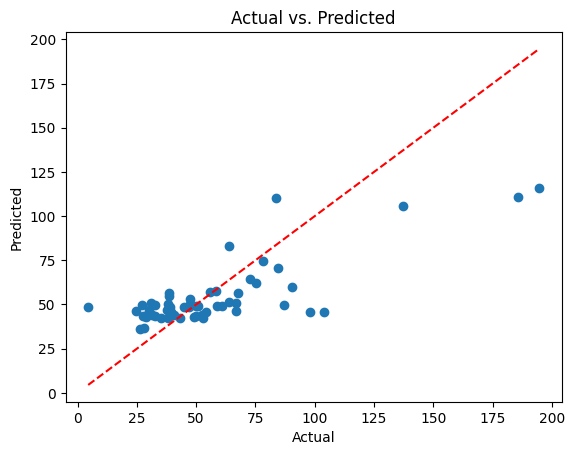

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [23]:
y_test_subset = y_test[y_test<=75]
y_pred_subset = y_pred[y_test<=75]
RMSE = np.mean((y_pred_subset-y_test_subset)**2)**.5
print(f"RMSE: {RMSE}")
MAE = np.mean(np.abs(y_pred_subset-y_test_subset))
print(f"MAE: {MAE}")

RMSE: 13.49331421978911
MAE: 10.965499093252117


In [24]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(
    learning_rate=0.05,         # Smaller learning rate for better generalization
    max_iter=1000,               # Number of boosting iterations
    max_depth=11,                # Limit tree depth to prevent overfitting
    min_samples_leaf=6,         # Minimum samples required at leaf nodes
    l2_regularization=1.0,      # Regularization to prevent overfitting
    max_bins=255,               # Number of bins for histogram-based algorithm
    early_stopping=True,        # Enable early stopping
    scoring='neg_mean_squared_error',  # Scoring metric for early stopping
    validation_fraction=0.2,    # Use 20% of training data for early stopping
    n_iter_no_change=20,        # Patience for early stopping
    verbose=1,                  # Show training progress
    random_state=42             # For reproducibility
)


In [25]:
hgbr.fit(X_train,y_train)
y_pred2 = hgbr.predict(X_test)
RMSE = np.mean((y_pred2-y_test)**2)**.5
print(f"RMSE: {RMSE}")
MAE = np.mean(np.abs(y_pred2-y_test))
print(f"MAE: {MAE}")

Binning 0.000 GB of training data: 0.028 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:


c:\Users\kvn34.LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kvn34.LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\kvn34.LAPTOP\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kvn34.LAPTOP\AppData\Local\Programs\Python\Python313\L

Fit 78 trees in 0.383 s, (1508 total leaves)
Time spent computing histograms: 0.085s
Time spent finding best splits:  0.042s
Time spent applying splits:      0.086s
Time spent predicting:           0.004s
RMSE: 23.768293997982546
MAE: 16.996004714992118


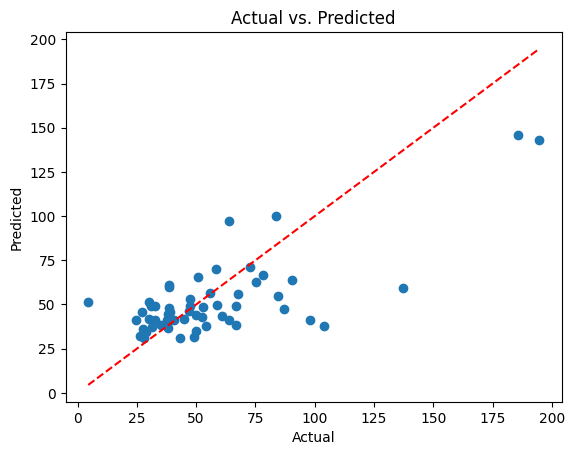

In [26]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()